In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
def load(path, is_client):
    with open(path, "r") as f:
        data =f.read().split('\n')
    data_formatted = []
    for i, row in enumerate(data):

        if i % 5 == 0:
            temp = []
            temp.append(int(re.findall('[0-9]+', row)[0]))
        elif i % 5 == 4:
            temp.append(np.float64(row.split()[-1][6:]))
            data_formatted.append(temp)
        else:
            temp.append(np.float64(row.split()[-1][6:]))
    data_formatted = data_formatted[:-1]
    if is_client:
        data_formatted = pd.DataFrame(data_formatted, columns=["Iter","SW-SEND-C","HW-SEND-C","SW-RECV-C","HW-RECV-C"])
    else:
        data_formatted = pd.DataFrame(data_formatted, columns=["Iter","SW-RECV-S","HW-RECV-S","SW-SEND-S","HW-SEND-S"])
    return data_formatted

In [3]:
datac = load("client_01.log", True)
datas = load("server_01.log", False)
data = pd.merge(left=datac, right=datas, on='Iter')

In [4]:
data["GO-DELAY-HARD"] = data['HW-RECV-S'] - data['HW-SEND-C']
data["GO-DELAY-SOFT"] = data['SW-RECV-S'] - data['SW-SEND-C']
data["BACK-DELAY-HARD"] = data['HW-RECV-C'] - data['HW-SEND-S']
data["BACK-DELAY-SOFT"] = data['SW-RECV-C'] - data['SW-SEND-S']
data["RTT-SOLF"] = (data['SW-RECV-C'] - data['SW-SEND-C']) - (data['SW-SEND-S'] - data['SW-RECV-S'])
data["RTT-HARD"] = (data['HW-RECV-C'] - data['HW-SEND-C']) - (data['HW-SEND-S'] - data['HW-RECV-S'])

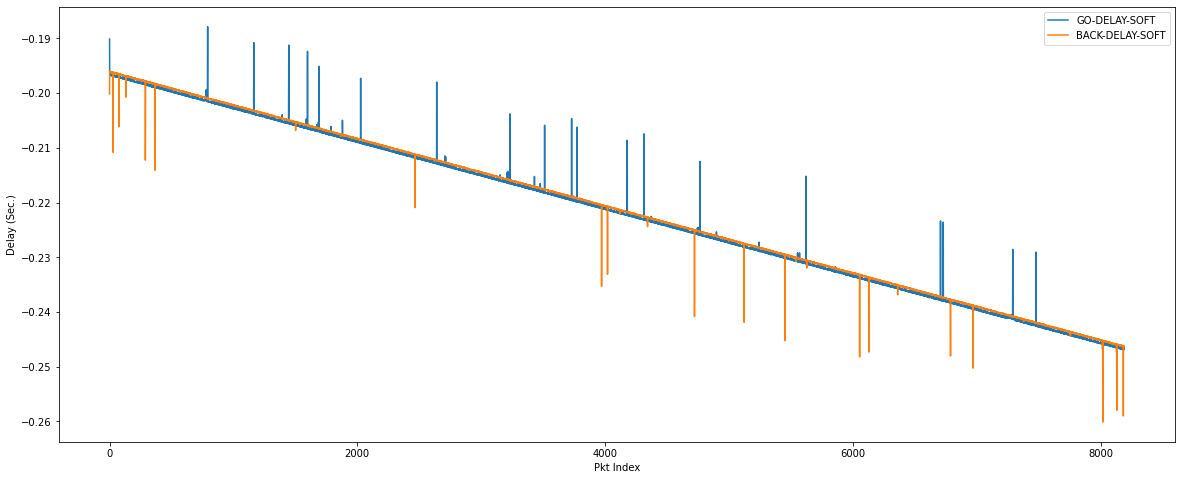

In [5]:
plt.figure(figsize=(20,8))
sns.lineplot(x=data['Iter'], y=-1 * data['GO-DELAY-SOFT'], label='GO-DELAY-SOFT')
sns.lineplot(x=data['Iter'], y=data['BACK-DELAY-SOFT'], label='BACK-DELAY-SOFT')
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("01.png")

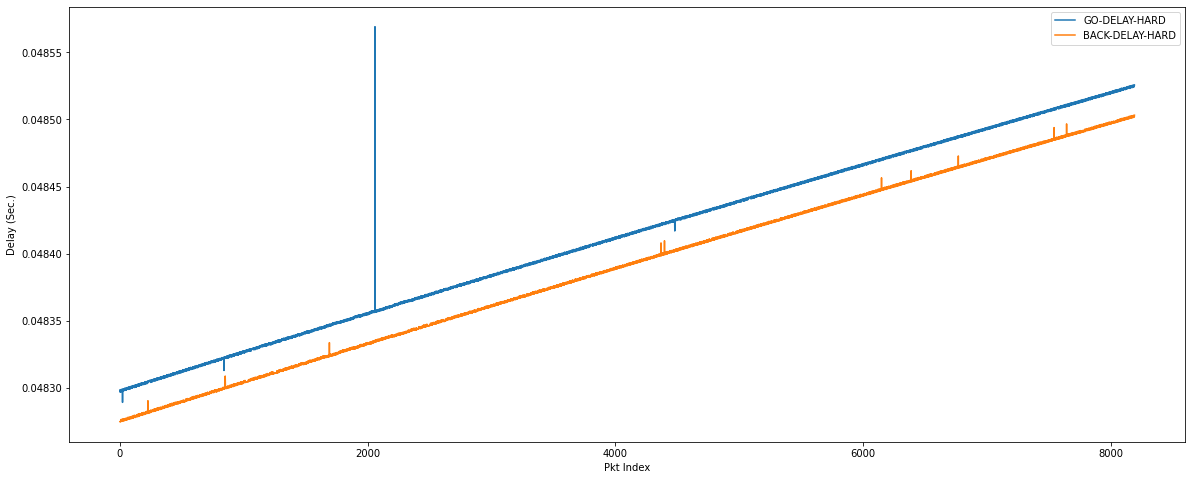

In [6]:
plt.figure(figsize=(20,8))

sns.lineplot(x=data['Iter'], y=data['GO-DELAY-HARD'], label='GO-DELAY-HARD')
sns.lineplot(x=data['Iter'], y= -1 * data['BACK-DELAY-HARD'], label='BACK-DELAY-HARD')
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("02.png")

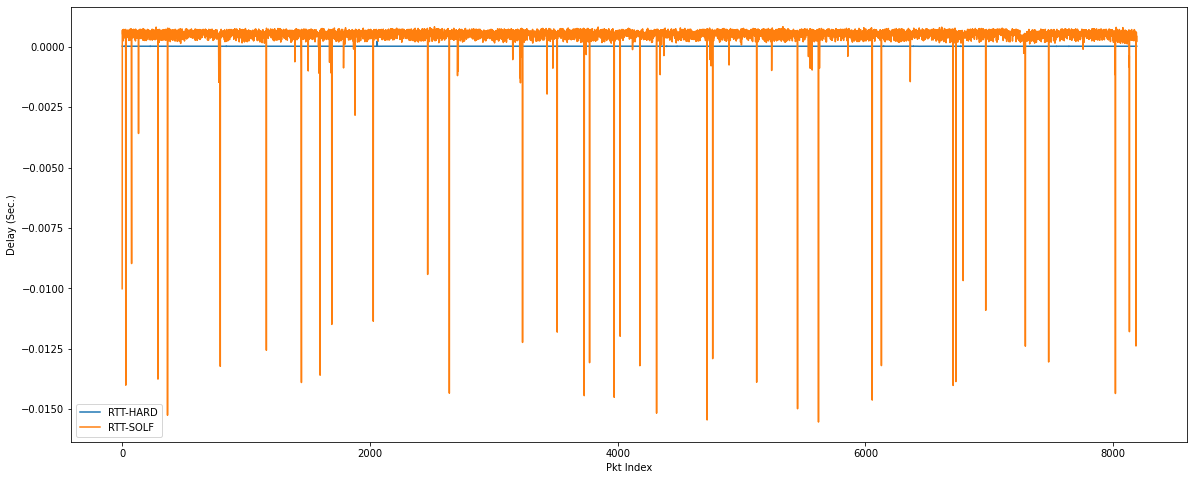

In [7]:
plt.figure(figsize=(20,8))
for i in ['RTT-HARD', 'RTT-SOLF']:
    sns.lineplot(x=data['Iter'], y=data[i], label=i)
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("03.png")

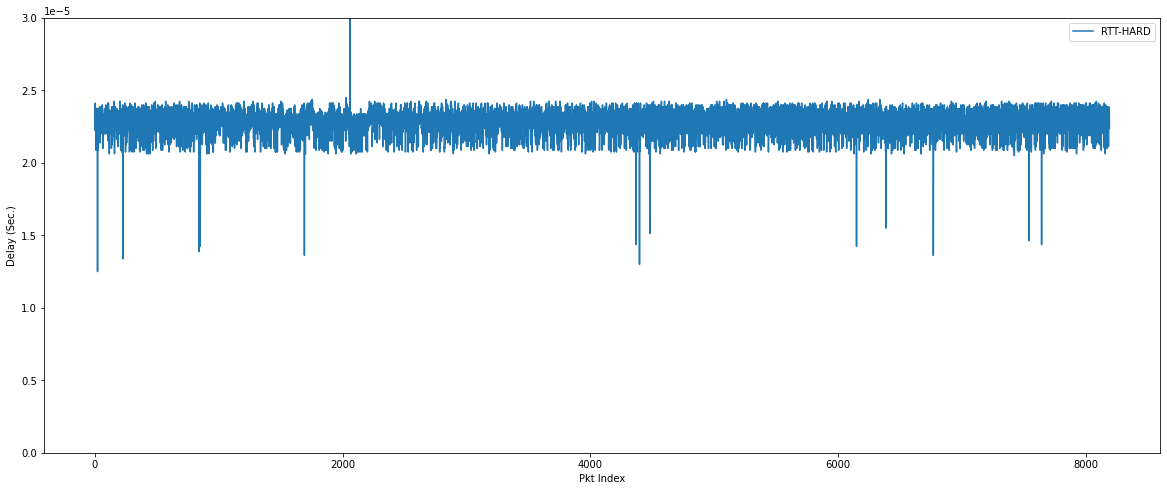

In [8]:
plt.figure(figsize=(20,8))
a = sns.lineplot(x=data['Iter'], y=data['RTT-HARD'], label='RTT-HARD')
plt.ylim(0, 0.00003)
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("04.png")

In [9]:
data[['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOLF','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']].describe()

,GO-DELAY-SOFT,BACK-DELAY-SOFT,RTT-SOLF,GO-DELAY-HARD,BACK-DELAY-HARD,RTT-HARD
count,8191.000000,8191.000000,8191.000000,8191.000000,8191.000000,8191.000000
mean,0.221684,-0.221228,0.000456,0.048413,-0.048391,0.000023
std,0.014535,0.014528,0.000949,0.000066,0.000065,0.000003
min,0.187841,-0.260116,-0.015541,0.048289,-0.048503,0.000012
25%,0.209140,-0.233810,0.000447,0.048357,-0.048447,0.000022
50%,0.221730,-0.221213,0.000555,0.048414,-0.048392,0.000023
75%,0.234279,-0.208667,0.000625,0.048470,-0.048334,0.000023
max,0.246944,-0.195985,0.000832,0.048569,-0.048275,0.000235


In [10]:
data_sns = pd.melt(data[['Iter','GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOLF', 'RTT-HARD']], id_vars=['Iter'])

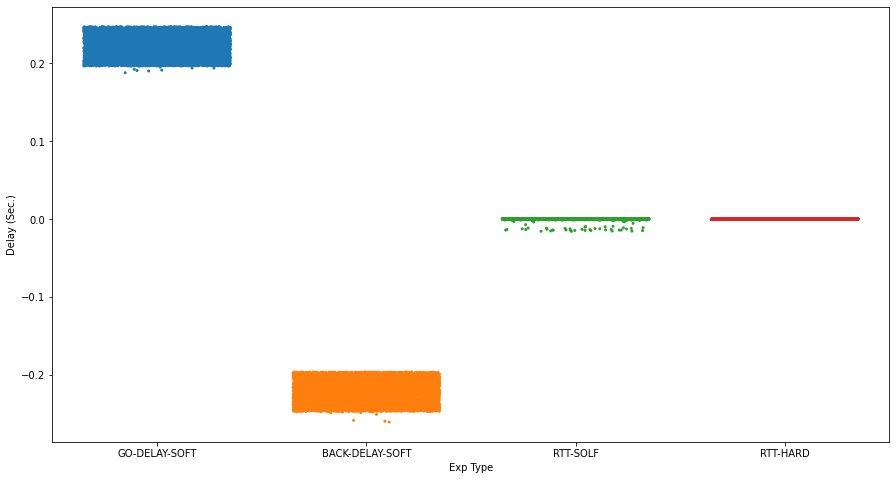

In [11]:
plt.figure(figsize=(15,8))
sns.stripplot(data = data_sns, y='value', x = 'variable',jitter=0.35,size=3)

plt.xlabel("Exp Type")
plt.ylabel("Delay (Sec.)")
plt.savefig("05.png")

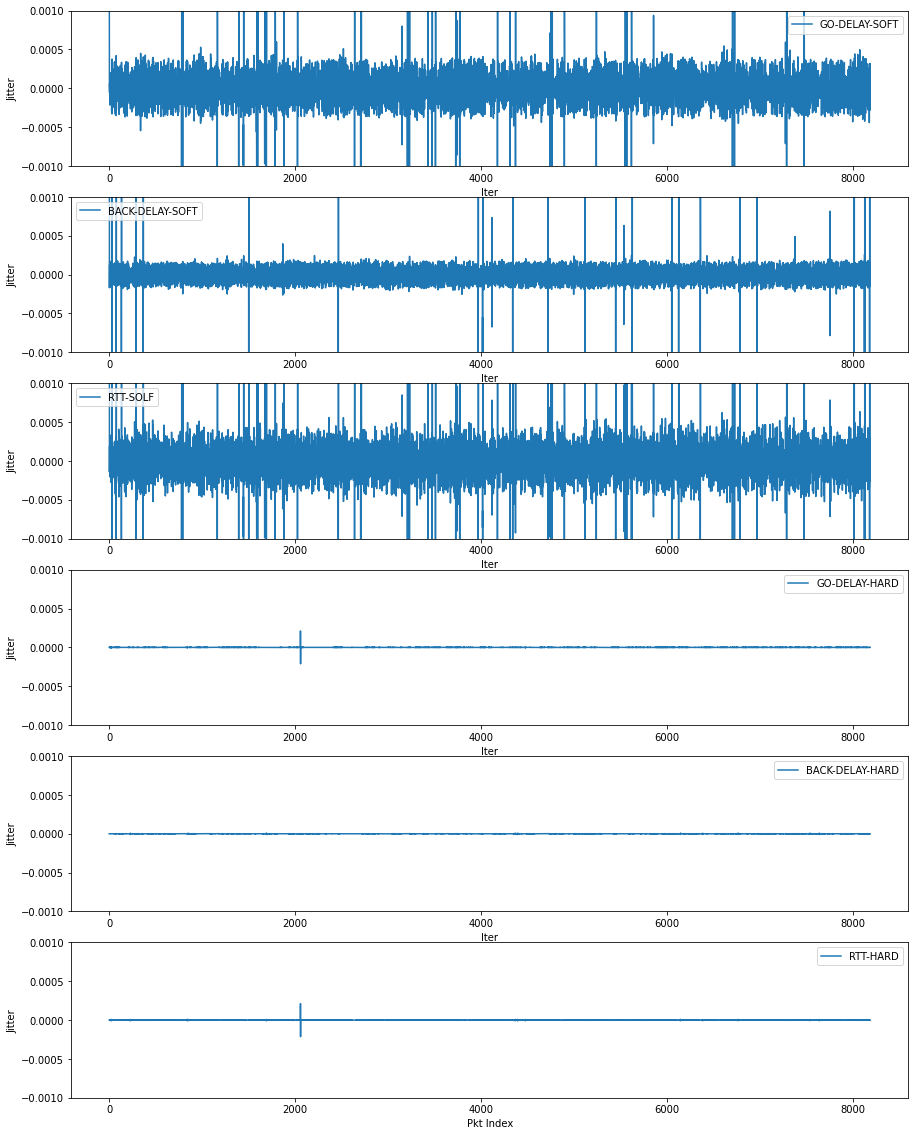

In [12]:
fig, axes = plt.subplots(6, 1, figsize=(15,20))
for n,i in enumerate(['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOLF','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']):
    a = sns.lineplot(x=data['Iter'], y=data[i].diff(), label=i,ax=axes[n])
    a.set(ylim=(-0.001, 0.001))
    a.set_ylabel('Jitter')
    plt.xlabel("Pkt Index")
plt.savefig("06.png")